# Building the Convolutional Neural Network

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


# Initializing the CNN

In [2]:
classifier = Sequential()

# Step 1 - Convolution

In [3]:
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

/home/atse/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


# Step 2 - Pooling

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a Second Convolutional Layer

In [5]:
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

/home/atse/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


# Step 3 - Flattening

In [6]:
classifier.add(Flatten())

# Step 4 - Full Connection

In [7]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))

/home/atse/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.


In [8]:
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

/home/atse/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


# Compiling the CNN

In [9]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the Images

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
train_datagen

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
test_datagen

In [15]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
training_set

Found 8000 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
test_set

Found 2000 images belonging to 2 classes.


In [17]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)

/home/atse/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=25, validation_steps=2000)`
  """


Epoch 1/25
250/250 [==============================] - 200s - loss: 0.6769 - acc: 0.5737 - val_loss: 0.6316 - val_acc: 0.6608
Epoch 2/25
250/250 [==============================] - 183s - loss: 0.6124 - acc: 0.6591 - val_loss: 0.5911 - val_acc: 0.6960
Epoch 3/25
250/250 [==============================] - 185s - loss: 0.5807 - acc: 0.6965 - val_loss: 0.5454 - val_acc: 0.7390
Epoch 4/25
250/250 [==============================] - 182s - loss: 0.5430 - acc: 0.7199 - val_loss: 0.5146 - val_acc: 0.7439
Epoch 5/25
250/250 [==============================] - 183s - loss: 0.5210 - acc: 0.7375 - val_loss: 0.4956 - val_acc: 0.7621
Epoch 6/25
250/250 [==============================] - 187s - loss: 0.4884 - acc: 0.7585 - val_loss: 0.4686 - val_acc: 0.7773
Epoch 7/25
250/250 [==============================] - 181s - loss: 0.4742 - acc: 0.7711 - val_loss: 0.4692 - val_acc: 0.7865
Epoch 8/25
250/250 [==============================] - 180s - loss: 0.4597 - acc: 0.7767 - val_loss: 0.4571 - val_acc: 0.7883


# Making New Predictions

In [18]:
import numpy as np

In [20]:
from keras.preprocessing import image

# Utilize the Images

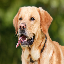

In [49]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64,64))
test_image

In [50]:
test_image = image.img_to_array(test_image)
test_image

array([[[  54.,   58.,    7.],
        [  58.,   63.,    9.],
        [  64.,   67.,   10.],
        ..., 
        [ 136.,  144.,   71.],
        [ 140.,  150.,   77.],
        [ 139.,  149.,   78.]],

       [[  48.,   54.,    6.],
        [  51.,   58.,    7.],
        [  58.,   63.,    9.],
        ..., 
        [ 129.,  137.,   64.],
        [ 139.,  149.,   78.],
        [ 141.,  151.,   80.]],

       [[  48.,   56.,    7.],
        [  48.,   56.,    7.],
        [  54.,   61.,   10.],
        ..., 
        [ 123.,  130.,   63.],
        [ 136.,  145.,   80.],
        [ 140.,  149.,   82.]],

       ..., 
       [[  46.,   55.,   12.],
        [  42.,   50.,    9.],
        [  38.,   49.,    9.],
        ..., 
        [ 239.,  205.,  170.],
        [ 235.,  209.,  186.],
        [ 229.,  202.,  173.]],

       [[  50.,   57.,   15.],
        [  42.,   50.,    9.],
        [  44.,   52.,   11.],
        ..., 
        [ 234.,  200.,  162.],
        [ 236.,  206.,  178.],
        [ 

In [51]:
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[  54.,   58.,    7.],
         [  58.,   63.,    9.],
         [  64.,   67.,   10.],
         ..., 
         [ 136.,  144.,   71.],
         [ 140.,  150.,   77.],
         [ 139.,  149.,   78.]],

        [[  48.,   54.,    6.],
         [  51.,   58.,    7.],
         [  58.,   63.,    9.],
         ..., 
         [ 129.,  137.,   64.],
         [ 139.,  149.,   78.],
         [ 141.,  151.,   80.]],

        [[  48.,   56.,    7.],
         [  48.,   56.,    7.],
         [  54.,   61.,   10.],
         ..., 
         [ 123.,  130.,   63.],
         [ 136.,  145.,   80.],
         [ 140.,  149.,   82.]],

        ..., 
        [[  46.,   55.,   12.],
         [  42.,   50.,    9.],
         [  38.,   49.,    9.],
         ..., 
         [ 239.,  205.,  170.],
         [ 235.,  209.,  186.],
         [ 229.,  202.,  173.]],

        [[  50.,   57.,   15.],
         [  42.,   50.,    9.],
         [  44.,   52.,   11.],
         ..., 
         [ 234.,  200.,  162.],
       

In [52]:
result = classifier.predict(test_image)
result

array([[ 1.]], dtype=float32)

In [53]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [55]:
if result [0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [56]:
prediction

'dog'

# Prediction 2

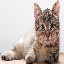

In [42]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64,64))
test_image

In [43]:
test_image = image.img_to_array(test_image)
test_image

array([[[ 239.,  239.,  239.],
        [ 239.,  239.,  239.],
        [ 239.,  239.,  239.],
        ..., 
        [ 245.,  245.,  245.],
        [ 245.,  245.,  245.],
        [ 245.,  245.,  245.]],

       [[ 239.,  239.,  239.],
        [ 239.,  239.,  239.],
        [ 239.,  239.,  239.],
        ..., 
        [ 245.,  245.,  245.],
        [ 245.,  245.,  245.],
        [ 244.,  244.,  244.]],

       [[ 239.,  239.,  239.],
        [ 239.,  239.,  239.],
        [ 239.,  239.,  239.],
        ..., 
        [ 244.,  244.,  244.],
        [ 244.,  244.,  244.],
        [ 244.,  244.,  244.]],

       ..., 
       [[ 241.,  217.,  205.],
        [ 243.,  220.,  206.],
        [ 241.,  219.,  205.],
        ..., 
        [ 227.,  200.,  181.],
        [ 233.,  205.,  191.],
        [ 232.,  215.,  197.]],

       [[ 255.,  237.,  227.],
        [ 251.,  234.,  227.],
        [ 252.,  235.,  227.],
        ..., 
        [ 219.,  193.,  178.],
        [ 219.,  193.,  180.],
        [ 

In [44]:
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[ 239.,  239.,  239.],
         [ 239.,  239.,  239.],
         [ 239.,  239.,  239.],
         ..., 
         [ 245.,  245.,  245.],
         [ 245.,  245.,  245.],
         [ 245.,  245.,  245.]],

        [[ 239.,  239.,  239.],
         [ 239.,  239.,  239.],
         [ 239.,  239.,  239.],
         ..., 
         [ 245.,  245.,  245.],
         [ 245.,  245.,  245.],
         [ 244.,  244.,  244.]],

        [[ 239.,  239.,  239.],
         [ 239.,  239.,  239.],
         [ 239.,  239.,  239.],
         ..., 
         [ 244.,  244.,  244.],
         [ 244.,  244.,  244.],
         [ 244.,  244.,  244.]],

        ..., 
        [[ 241.,  217.,  205.],
         [ 243.,  220.,  206.],
         [ 241.,  219.,  205.],
         ..., 
         [ 227.,  200.,  181.],
         [ 233.,  205.,  191.],
         [ 232.,  215.,  197.]],

        [[ 255.,  237.,  227.],
         [ 251.,  234.,  227.],
         [ 252.,  235.,  227.],
         ..., 
         [ 219.,  193.,  178.],
       

In [45]:
result = classifier.predict(test_image)
result

array([[ 0.]], dtype=float32)

In [46]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [47]:
if result [0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [48]:
prediction

'cat'